![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [2]:
df_beer = pd.read_csv('data/datasets_beers.csv') # index_col
df_beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [3]:
df_beer.drop(columns=['Unnamed: 0'], inplace=True)
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
df_beer.to_csv('prueba.csv')

In [5]:
df_prueba = pd.read_csv('prueba.csv')

In [6]:
df_prueba.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [7]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [8]:
df_beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [9]:
df_beer.shape

(2410, 7)

In [10]:
len(df_beer)

2410

In [11]:
len(df_beer.columns)

7

## Ejercicio 5
¿De qué tipo son los datos?

In [12]:
df_beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuartiles...

In [13]:
df_describe = df_beer[['abv','ibu','ounces']].describe()
df_describe

,abv,ibu,ounces
count,2348.000000,1405.000000,2410.000000
mean,0.059773,42.713167,13.592241
std,0.013542,25.954066,2.352204
min,0.001000,4.000000,8.400000
25%,0.050000,21.000000,12.000000
50%,0.056000,35.000000,12.000000
75%,0.067000,64.000000,16.000000
max,0.128000,138.000000,32.000000


In [14]:
df_describe = df_beer[['abv','ibu','ounces']].agg(['mean','count'])
df_describe

,abv,ibu,ounces
mean,0.059773,42.713167,13.592241
count,2348.000000,1405.000000,2410.000000


In [15]:
df_describe = df_beer.agg(
        {
            "abv" : ['mean','count'],
            "ibu" : ['mean','max','count'],
            "ounces" : ['mean','max','count','min']
        }
)

df_describe

,abv,ibu,ounces
mean,0.059773,42.713167,13.592241
count,2348.000000,1405.000000,2410.000000
max,NaN,138.000000,32.000000
min,NaN,NaN,8.400000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [16]:
df_beer['style'].value_counts()[0:10]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: style, dtype: int64

In [17]:
df_beer.groupby('style')[['name']].count().sort_values('name', ascending=False)[0:10]

,name
style,
American IPA,424
American Pale Ale (APA),245
American Amber / Red Ale,133
American Blonde Ale,108
American Double / Imperial IPA,105
American Pale Wheat Ale,97
American Brown Ale,70
American Porter,68
Saison / Farmhouse Ale,52


In [18]:
len(df_beer['style'].unique())

100

In [19]:
df_beer[df_beer['style'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces
566,NaN,NaN,2210,Special Release,NaN,29,16.0
853,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0
866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0
1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0
1555,NaN,NaN,1790,CAN'D AID Foundation,NaN,166,12.0


In [20]:
df_beer['style'].nunique()

99

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [21]:
df_beer.iloc[9:20,:]

,abv,ibu,id,name,style,brewery_id,ounces
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0


In [22]:
df_beer.iloc[9:20,3:]

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


In [23]:
df_beer[['abv','ibu','ounces']].iloc[9:20]

,abv,ibu,ounces
9,0.086,NaN,12.0
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0


In [24]:
df_beer[['abv','ibu','ounces']].iloc[9:20].values

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [25]:
df_beer[['abv','ibu','ounces']].iloc[9:20].to_numpy()

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [26]:
df_beer[['abv','ibu','ounces']].iloc[9:20].shape

(11, 3)

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [27]:
df_beer['ounces'].sum()

32757.3

In [28]:
df_beer.groupby('style')[['ounces']].mean().sort_values('ounces', ascending=True)[0:10]

,ounces
style,
American Barleywine,10.8
Abbey Single Ale,12.0
Braggot,12.0
English Pale Mild Ale,12.0
Euro Pale Lager,12.0
Foreign / Export Stout,12.0
Grisette,12.0
Kristalweizen,12.0
Old Ale,12.0


## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [29]:
round(df_beer['ibu'].mean(), 2)

42.71

In [30]:
print("Maximo", df_beer['ibu'].max())
print("Minimo", df_beer['ibu'].min())

Maximo 138.0
Minimo 4.0


In [31]:
df_beer[df_beer['ibu'] == df_beer['ibu'].max()]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [32]:
df_beer[df_beer['ibu'] == df_beer['ibu'].min()]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [33]:
len(df_beer)

2410

In [34]:
1405/2410

0.58298755186722

In [35]:
df_beer[['ibu']].describe()

,ibu
count,1405.000000
mean,42.713167
std,25.954066
min,4.000000
25%,21.000000
50%,35.000000
75%,64.000000
max,138.000000


In [36]:
print(df_beer['ibu'].var())
print(df_beer['ibu'].std())

673.6135373259929
25.954065911259317


In [37]:
stats.kurtosis(df_beer[df_beer['ibu'].notna()]['ibu'])

-0.1394969855232815

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [38]:
df_beer.corr()

,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691
id,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000


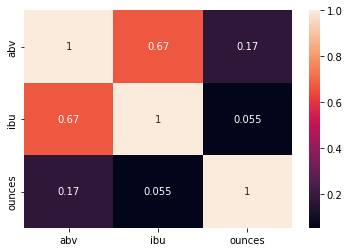

In [39]:
sns.heatmap(df_beer[['abv','ibu','ounces']].corr(), annot=True);

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

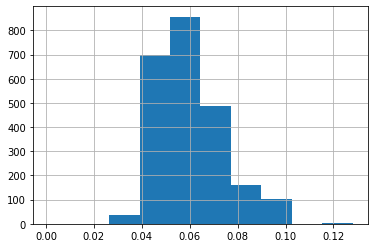

In [41]:
df_beer['abv'].hist();

In [44]:
from scipy import stats

stats.skew(df_beer[df_beer['abv'].notna()]['abv'])

0.9578647103102429

In [45]:
stats.skew(df_beer['abv'].fillna(df_beer['abv'].mean()))

0.9704287360715808

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

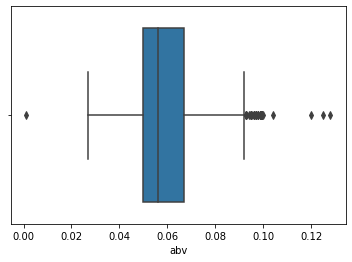

In [50]:
sns.boxplot(x = df_beer['abv']);

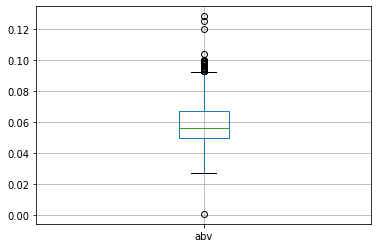

In [52]:
df_beer.boxplot('abv');

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [55]:
df_beer.groupby('style')[['abv']].mean().sort_values('abv', ascending=False)[0:10]

,abv
style,
English Barleywine,0.107667
Quadrupel (Quad),0.104000
American Barleywine,0.099000
American Malt Liquor,0.099000
Russian Imperial Stout,0.097636
American Double / Imperial Stout,0.093667
American Double / Imperial IPA,0.087369
Tripel,0.086818
Baltic Porter,0.085167


In [57]:
df_beer.groupby('style')[['ibu']].mean().sort_values('ibu', ascending=False)[0:10]

,ibu
style,
American Barleywine,96.000000
American Double / Imperial IPA,93.320000
Russian Imperial Stout,86.500000
American Double / Imperial Pilsner,85.000000
Belgian Strong Dark Ale,72.000000
American Black Ale,68.900000
American IPA,67.634551
English Barleywine,66.666667
English Stout,66.000000


## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [60]:
df_brew = pd.read_csv('data/datasets_breweries.csv')
df_brew.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [61]:
df_brew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [63]:
# df_brew.describe(include='all')

## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [66]:
df_brew.rename(columns={"Unnamed: 0": 'brewery_id', "name":"brewery_name"}, inplace=True)

In [67]:
df_brew.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 18
Junta los dos datasets que tienes

In [68]:
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [69]:
df_brew.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [72]:
df = pd.merge(df_beer, df_brew)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [73]:
df['state'].nunique()

51

In [74]:
df['city'].nunique()

384

In [75]:
df['brewery_name'].nunique()

551

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [76]:
df.groupby(['state','city'])['abv'].agg(['mean','median','max'])

mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [78]:
df[df['state']=='IN']

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state


In [87]:
df[df['state'].str.contains('IN')].sort_values('abv', ascending=False)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
2189,0.120,90.0,2621,Csar,Russian Imperial Stout,17,16.0,Tin Man Brewing Company,Evansville,IN
2037,0.099,36.0,2083,Bourbon Barrel Batch 666: Sympathy for the Devil,Belgian Dark Ale,25,16.0,Sun King Brewing Company,Indianapolis,IN
2066,0.099,60.0,394,Johan the Barleywine,English Barleywine,25,16.0,Sun King Brewing Company,Indianapolis,IN
2049,0.099,75.0,1367,Bourbon Barrel Aged Timmie,Russian Imperial Stout,25,16.0,Sun King Brewing Company,Indianapolis,IN
479,0.099,115.0,2471,Hopkick Dropkick,American Double / Imperial IPA,24,12.0,Burn 'Em Brewing,Michigan City,IN
...,...,...,...,...,...,...,...,...,...,...
1625,0.042,NaN,1956,Farmer's Daughter Wheat,American Pale Wheat Ale,205,12.0,People's Brewing Company,Lafayette,IN
945,0.042,26.0,439,Great Crescent Mild Ale,English Dark Mild Ale,165,16.0,Great Crescent Brewery,Aurora,IN
851,0.040,NaN,1657,Leprechaun Lager,American Pale Lager,348,12.0,Four Horsemen Brewing Company,South Bend,IN
2044,NaN,NaN,1948,30 Min Coma,Belgian IPA,25,16.0,Sun King Brewing Company,Indianapolis,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [89]:
df['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [91]:
df.fillna(df['ibu'].mean()).groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.000000,135.000000,135.000000,135.000000,135.000000
Abita Springs,3.0,27.333333,21.455380,13.000000,15.000000,17.000000,34.500000,52.000000
Ada,1.0,42.713167,NaN,42.713167,42.713167,42.713167,42.713167,42.713167
Afton,4.0,43.000000,19.899749,22.000000,28.000000,45.000000,60.000000,60.000000
Airway Heights,5.0,42.713167,0.000000,42.713167,42.713167,42.713167,42.713167,42.713167
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.000000,39.750000,44.000000,51.000000,72.000000
Worcester,1.0,69.000000,NaN,69.000000,69.000000,69.000000,69.000000,69.000000
Yakima,2.0,54.000000,22.627417,38.000000,46.000000,54.000000,62.000000,70.000000


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

In [92]:
df[df['abv'] >= 0.07]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2380,0.080,31.0,761,P-51 Porter,American Porter,509,16.0,Wingman Brewers,Tacoma,WA
2382,0.071,60.0,2148,#002 American I.P.A.,American IPA,211,12.0,Wisconsin Brewing Company,Verona,WI
2398,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0,Worthy Brewing Company,Bend,OR
2402,0.082,NaN,1316,Colorojo Imperial Red Ale,American Strong Ale,424,12.0,Wynkoop Brewing Company,Denver,CO


In [102]:
df_minabv = df.groupby('brewery_name', as_index=False)[['abv']].min()
df_minabv.head()

,brewery_name,abv
0,10 Barrel Brewing Company,0.050
1,18th Street Brewery,0.045
2,2 Towns Ciderhouse,0.060
3,21st Amendment Brewery,0.044
4,3 Daughters Brewing,0.050


In [103]:
df[df['brewery_name'] == "18th Street Brewery"]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
7,0.065,NaN,2259,Foreman,American Porter,177,12.0,18th Street Brewery,Gary,IN
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0,18th Street Brewery,Gary,IN


In [98]:
pd.merge(df, df_minabv[df_minabv['abv'] >= 0.07], how='inner')

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.070,45.0,1322,Green Bullet Organic India Pale Ale,American IPA,429,16.0,Asher Brewing Company,Boulder,CO
1,0.070,46.0,2618,Thai.p.a,American IPA,20,16.0,Bare Hands Brewery,Granger,IN
2,0.088,108.0,1806,Hoptopus Double IPA,American Double / Imperial IPA,306,16.0,Beach Brewing Company,Virginia Beach,VA
3,0.072,75.0,2620,Saucy Intruder,Rye Beer,18,16.0,Black Acre Brewing Co.,Indianapolis,IN
4,0.080,80.0,1812,Quarter Mile Double IPA,American Double / Imperial IPA,304,12.0,Blue Hills Brewery,Canton,MA
5,0.071,16.0,2062,Noche Dulce,American Porter,231,16.0,Borderlands Brewing Company,Tucson,AZ
6,0.089,126.0,2440,Bay of Bengal Double IPA (2014),American Double / Imperial IPA,99,12.0,Christian Moerlein Brewing Company,Cincinnati,OH
7,0.072,NaN,1623,Lift Off IPA,American IPA,358,16.0,Daredevil Brewing Company,Shelbyville,IN
8,0.070,NaN,1107,Nut Sack Imperial Brown Ale,American Brown Ale,465,12.0,Engine 15 Brewing,Jacksonville Beach,FL
9,0.070,73.0,2254,Salamander Slam,American IPA,180,16.0,Frog Level Brewing Company,Waynesville,NC


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [104]:
df['ibu'].mean()

42.71316725978647

In [107]:
df_meanibu = df.groupby('state')[['ibu']].mean()
df_meanibu

,ibu
state,
AK,40.882353
AL,51.222222
AR,39.000000
AZ,35.208333
CA,46.281481
CO,47.431507
CT,40.833333
DC,55.250000
DE,52.000000


In [110]:
states = list(df_meanibu[df_meanibu['ibu'] >= df['ibu'].mean()].index)
states

[' AL',
 ' CA',
 ' CO',
 ' DC',
 ' DE',
 ' FL',
 ' GA',
 ' ID',
 ' IN',
 ' ME',
 ' MN',
 ' MS',
 ' NC',
 ' NH',
 ' NJ',
 ' NM',
 ' NV',
 ' NY',
 ' OH',
 ' OR',
 ' UT',
 ' VA',
 ' WA',
 ' WV']

In [111]:
df[df['state'].isin(states)]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO
